# Pepper Disease Detection Model

This notebook implements a Convolutional Neural Network (CNN) for detecting diseases in pepper plants. The model classifies pepper leaf images into different disease categories using TensorFlow and Keras.

## Project Overview
- **Dataset**: Pepper plant disease images
- **Model**: CNN with data augmentation
- **Output**: Quantized TensorFlow Lite model for deployment

In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

## 1. Import Required Libraries

Importing the necessary libraries for deep learning, data processing, and visualization.

In [24]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/apple/Desktop/deep learning  project  -- DIsease analysis /data',
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
)

Found 2475 files belonging to 2 classes.


## 2. Data Loading and Exploration

Loading the pepper disease dataset from the local directory and exploring its structure.

In [25]:
class_names = data.class_names

In [26]:
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [27]:
len(data)

78

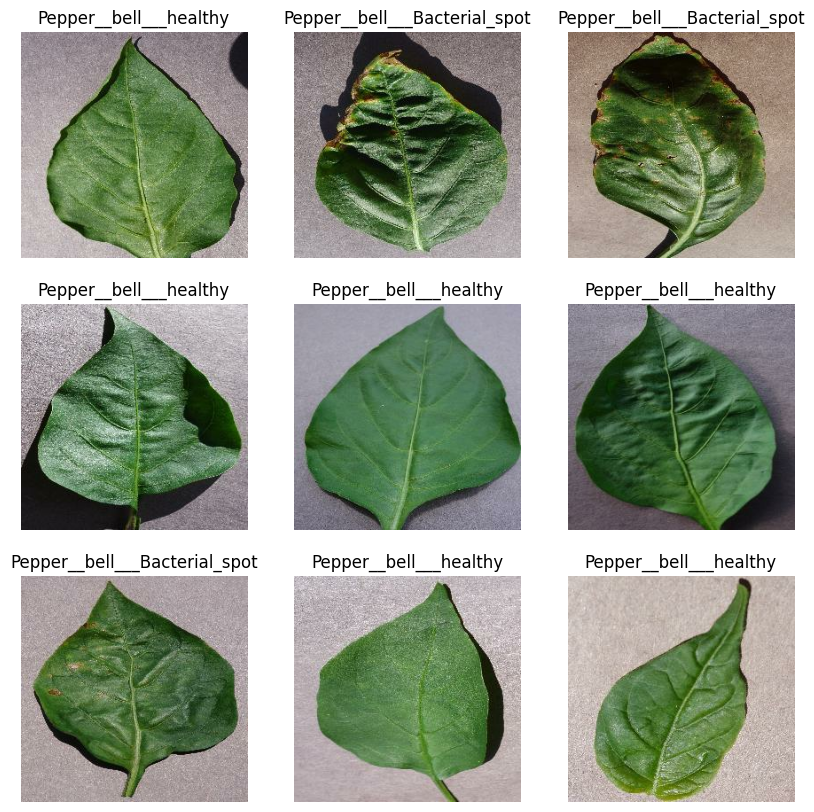

In [28]:
for images, labels in data.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

### Visualizing Sample Images

Displaying a sample of images from the dataset to understand the different disease classes.

In [29]:
train_ds = data.take(62)
test_ds = data.skip(62)

## 3. Data Preparation

### Splitting the Dataset

Dividing the dataset into training, validation, and test sets for proper model evaluation.

In [30]:
len(train_ds),len(test_ds)

(62, 16)

In [31]:
len(data)

78

In [32]:
val_ds = test_ds.take(8)
test_ds = test_ds.skip(8)

In [33]:
len(train_ds), len(val_ds), len(test_ds)

(62, 8, 8)

In [34]:
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### Data Pipeline Optimization

Optimizing the data pipeline with caching, shuffling, and prefetching for better training performance.

In [35]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1./255)
])

## 4. Data Preprocessing

### Image Resizing and Normalization

Creating preprocessing layers to resize images and normalize pixel values.

In [37]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

### Data Augmentation

Implementing data augmentation techniques to increase dataset diversity and improve model generalization.

In [ ]:
model = models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.build(input_shape=(None, 256, 256, 3))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                

## 5. Model Architecture

### Building the CNN Model

Creating a Convolutional Neural Network with:
- Data preprocessing and augmentation layers
- Multiple convolutional and pooling layers
- Dense layers for classification
- Softmax activation for multi-class prediction

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model Compilation

Configuring the model with optimizer, loss function, and metrics for training.

In [40]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
62/62 [==============================] - 48s 753ms/step - loss: 0.7535 - accuracy: 0.6426 - val_loss: 0.6379 - val_accuracy: 0.7461
Epoch 2/10
62/62 [==============================] - 47s 759ms/step - loss: 0.3719 - accuracy: 0.8463 - val_loss: 0.5608 - val_accuracy: 0.7773
Epoch 3/10
62/62 [==============================] - 49s 784ms/step - loss: 0.2866 - accuracy: 0.9002 - val_loss: 0.2457 - val_accuracy: 0.9023
Epoch 4/10
62/62 [==============================] - 49s 794ms/step - loss: 0.2518 - accuracy: 0.9128 - val_loss: 0.3795 - val_accuracy: 0.8633
Epoch 5/10
62/62 [==============================] - 95s 2s/step - loss: 0.1827 - accuracy: 0.9395 - val_loss: 0.2656 - val_accuracy: 0.9062
Epoch 6/10
62/62 [==============================] - 52s 831ms/step - loss: 0.1699 - accuracy: 0.9451 - val_loss: 0.2200 - val_accuracy: 0.9336
Epoch 7/10
62/62 [==============================] - 55s 888ms/step - loss: 0.1383 - accuracy: 0.9592 - val_loss: 0.1148 - val_accuracy: 0.9688
Ep

## 6. Model Training

Training the model on the prepared dataset with validation monitoring.

In [41]:
model.evaluate(test_ds)

8/8 [==============================] - 2s 164ms/step - loss: 0.1059 - accuracy: 0.9660


[0.10588088631629944, 0.9659574627876282]

## 7. Model Evaluation

### Testing Model Performance

Evaluating the trained model on the test dataset to measure final performance.

1/1 [==============================] - 0s 473ms/step


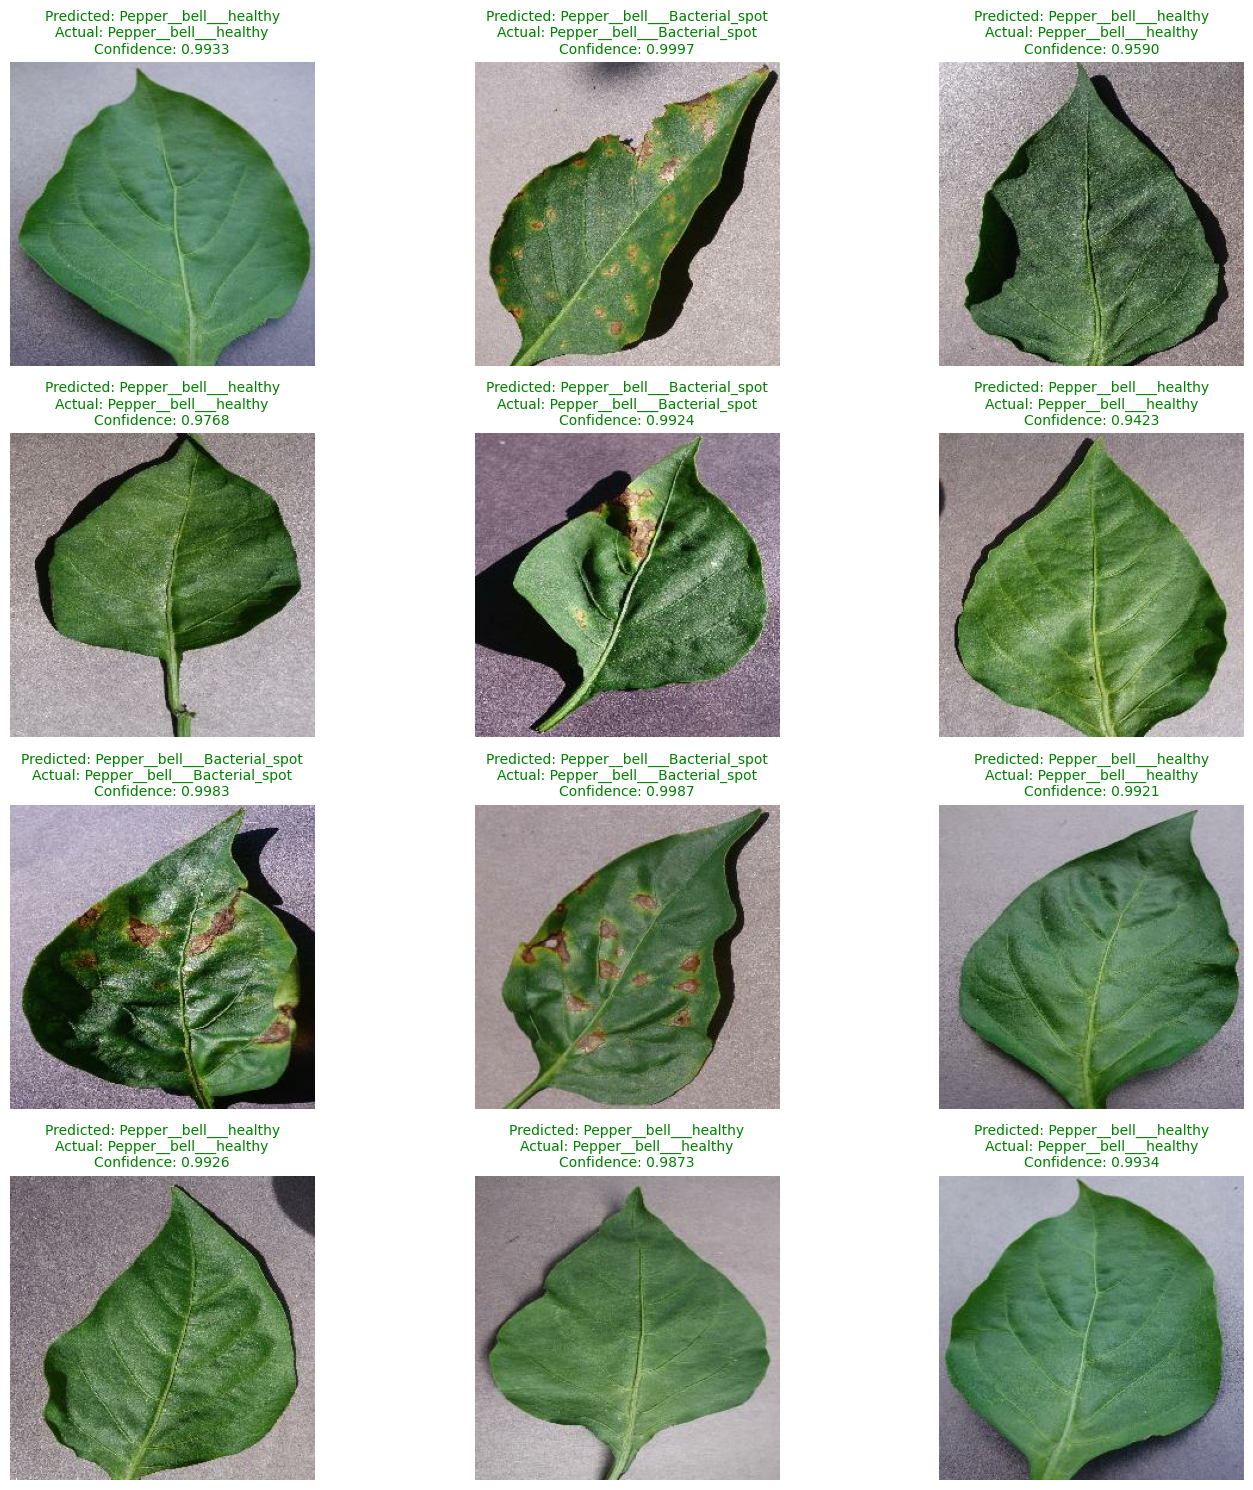

In [42]:
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    predicted_labels = tf.argmax(predictions, axis=1)
    confidence_scores = tf.reduce_max(predictions, axis=1)
    
    plt.figure(figsize=(15, 15))
    
    for i in range(min(12, len(images))):  # Show up to 12 images
        predicted_class = class_names[predicted_labels[i]]
        actual_class = class_names[labels[i]]
        confidence = confidence_scores[i].numpy()
        
        # Set color based on prediction accuracy
        color = 'green' if predicted_class == actual_class else 'red'
        
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {predicted_class}\nActual: {actual_class}\nConfidence: {confidence:.4f}", 
                 color=color, fontsize=10)
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

### Visualizing Predictions

Displaying model predictions on test images with confidence scores and accuracy indicators.

In [ ]:
# Convert the model to TensorFlow Lite with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
quantized_model = converter.convert()

# Save the quantized model
with open('pepper_disease_model_quantized.tflite', 'wb') as f:
    f.write(quantized_model)

print(f"Quantized model size: {len(quantized_model) / 1024:.2f} KB")
print("Quantized TensorFlow Lite model saved successfully!")

INFO:tensorflow:Assets written to: /var/folders/yz/g64y8mmn14s9pwtfnjw85rlc0000gn/T/tmp52vejm4u/assets


INFO:tensorflow:Assets written to: /var/folders/yz/g64y8mmn14s9pwtfnjw85rlc0000gn/T/tmp52vejm4u/assets


Original model size: 173956.19 KB
Quantized model size: 14502.68 KB


2025-08-20 18:38:09.113091: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2025-08-20 18:38:09.113226: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2025-08-20 18:38:09.118199: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/yz/g64y8mmn14s9pwtfnjw85rlc0000gn/T/tmp52vejm4u
2025-08-20 18:38:09.119862: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-08-20 18:38:09.119867: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/yz/g64y8mmn14s9pwtfnjw85rlc0000gn/T/tmp52vejm4u
2025-08-20 18:38:09.124489: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-08-20 18:38:09.126296: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2025-08-20 18:38:09.386764: I tensorflow/cc/saved_model/loader.

## 8. Model Conversion and Optimization

### Converting to TensorFlow Lite

Converting the trained model to TensorFlow Lite format with quantization for efficient deployment on mobile and edge devices.